In [1]:
# Imports
from virtual_lab.experiments import Experiment
from virtual_lab.simulation import Simulation
from virtual_lab.model import Model

In [2]:
class LIF(Model):
    def voltage_equation(self,t):
        v = self.variables.v
        u = self.variables.u
        return (-v + u + self.b)/self.tau_v
    
    def current_equation(self,t):
        u = self.variables.u
        a_in = self.variables.a_in
        return (-u + a_in)/self.tau_u
    
    def activation_equation(self,t):
        return self.weight * self.spikes_in[t]

    def diff_equations_dict(self):
        return {'v': self.voltage_equation,
                'u': self.current_equation}
    def equations_dict(self):
        return {'a_in': self.activation_equation}
    
    def quantity_dependencies(self):
        return {'spikes_in': {'spikes': 1}}

In [3]:
init_values = {
    'v': 10,
    'u': 50,
    'a_in': 0
}
constants = {
    'weight': 100,
    'tau_v': 20,
    'tau_u': 5,
    'b': 1,
}
import numpy as np
T = 200
exp_with_spikes = Experiment('incoming_spikes', {'spikes': [[k,1] for k in np.linspace(10,T,10)]}, T = T)
exp_no_spikes = Experiment('no_spikes',T= T)
neuron = LIF('LIF',init_values,constants)
Sim = Simulation(neuron)
results = Sim.run_experiments(exp_with_spikes)

The method 'set_initial_values' is not implemented in model <class '__main__.LIF'>: LIF, this implies that all the variable and constant initial values were given through the const argument at initialization of the Model class.


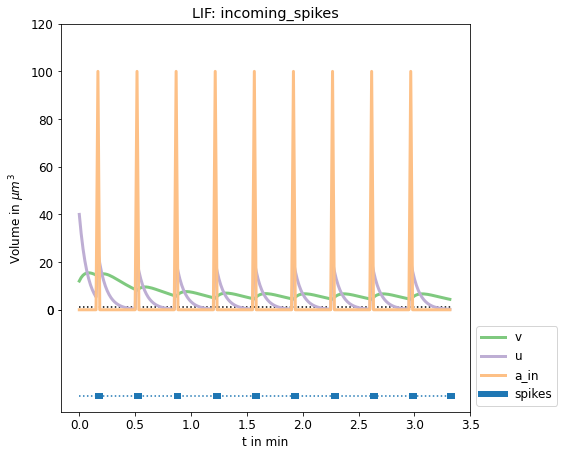

In [4]:
Sim.plot_results()